# Create synthetic dataset for training

The `create_dataset` creates a split data set for training, validation (or development) and testing. It's not optimized, and takes about 4-5 hours on Google Colab to finished.

Please note that evaluation on synthetic validation or test does not report realistic performance, make sure to use real data instead. However, the two performance gaps between performance measured on

 * synthetic training data,
 * synthetic validation or test data, and
 * real test data,

denote error due to 

 * overfitting, respectively
 * suboptimal realism of the synthetic data. 

If the synthetic test performance is worse than realistic test performance, this would indicate the synthetic data is tougher than the realistic data, for example due to unrealistic variations allowed by synthetic data.

This notebook illustrates creating a random data set.

This notebook was tested on Google Colab.

In [17]:
import numpy
import json
from google.colab import files

# # Install detectron2 based on the installed version of torch,
# # we assume torchvision is already installed as is the case on Google Colab.
# try:
#   import detectron2
# except ImportError:
#   torch_version, cuda_version = torch.__version__.split('+cu')
#   torch_version = '.'.join(torch_version.split('.')[:2])

#   !pip3 install -U pyyaml
#   !pip3 install detectron2 -f "https://dl.fbaipublicfiles.com/detectron2/wheels/cu{cuda_version}/torch{torch_version}/index.html"
#   import detectron2

# Install the syntheticyeastcells from github if unavailable.
# To clear the Box_Mode warning, install detectron2 by uncommenting the
# previous statements. Ignoring the warning will unlikely cause issues.
# If training detectron2 on this data fails, and the error seems misaligned
# labels, then you might experience an issue related to the warning, as the
# coordinate system used for the labels might be wrong.
try:
  from syntheticyeastcells.detectron2 import create_dataset
except ImportError:
  !test -e synthetic-yeast-cells || git clone https://4ac6820a34a48a257418332f2261890b1218b9d3@github.com/prhbrt/synthetic-yeast-cells.git
  !cd synthetic-yeast-cells && git pull origin master
  !pip3 install ./synthetic-yeast-cells
  from syntheticyeastcells.detectron2 import create_dataset
try:
  import umsgpack
except ImportError:
  !pip3 install umsgpack
  import umsgpack

     |████████████████████████████████| 143kB 4.2MB/s 
  Created wheel for msgpack-python: filename=msgpack_python-0.5.6-cp37-cp37m-linux_x86_64.whl size=305475 sha256=7413868c0dbabeb1fd126550b77616c1973f18679ffe78ae7d11b2a3562a843f
  Stored in directory: /root/.cache/pip/wheels/d5/de/86/7fa56fda12511be47ea0808f3502bc879df4e63ab168ec0406
Successfully built msgpack-python


In [2]:
# location to store the result
version = 'v1'
synthetic_data_path = f'/content/synthetic-yeast-cells-{version}/'

In [3]:
labels = create_dataset(
  # Where to store the data set
  synthetic_data_path,

  # sizesof several subsets
  # for a quick proof of concept, use the smaller numbers.
  sets={'test': 1000, 'val': 1000, 'train': 20000},
  # sets={'test': 10, 'val': 10, 'train': 20},

  # same parameters as before
  n_cells_per_image=100,
  size=(512, 512),
  min_distance_boundary=50,
  r0_range=(2, 14),
  r1_factor_range=(0.7, 1.3),
  spatial_blur_std=1.5,
  background_intensity=0.4,
  background_contrast=0.00188,
  core_contrast=0.0752,
  p_white_outside=0.5,

  # number of processes to run in parallel, number of samples created in one batch
  njobs=2, batch_size=10,

  # show a progressbar
  progressbar=True)

# with open(f'{synthetic_data_path}/labels.json', 'w') as f:
#   json.dump(labels, f)

with open(f'{synthetic_data_path}/labels.umsgpack', 'wb') as f:
  umsgpack.pack(labels, f, encoding = "utf-8")

  0%|          | 0/2200 [00:00<?, ?it/s]

## Result

These cells respectively
 * list the created files, e.g. images and the json with labels,
 * show an example synthetic image, and
 * archive the data set to allow downloading.

If you download the data set, this allows you to use it to train a model. Alternatively, you can also combine the training notebook with this one to skip downloading a large file.

In [19]:
!ls '{synthetic_data_path}'*

.. Manually removed lines ...

/content/synthetic-yeast-cells-v1/val:
image-0.jpg    image-280.jpg  image-460.jpg  image-640.jpg  image-820.jpg
image-100.jpg  image-281.jpg  image-461.jpg  image-641.jpg  image-821.jpg
.. Manually removed lines ...
image-27.jpg   image-45.jpg   image-63.jpg   image-81.jpg   image-9.jpg


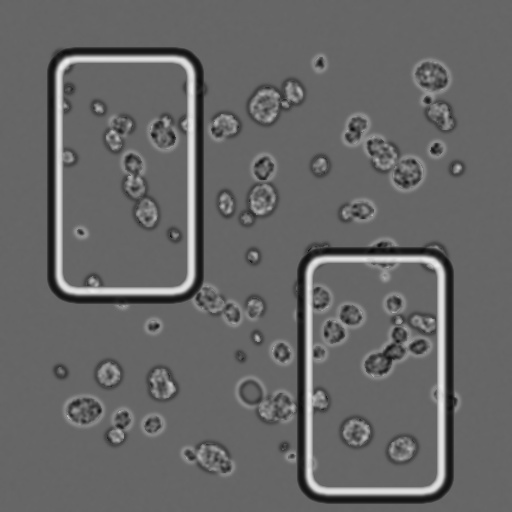

In [20]:
from IPython.display import Image

Image(f"{synthetic_data_path}/train/image-11.jpg")

In [23]:
!ls '{synthetic_data_path}'

labels.umsgpack  test  train  val


## Download

The resulting file will be around 1.1-1.2 GB, so downloading takes some time. Consider mounting Google Drive and saving it there if you can affort the space.

In [ ]:
!cd '{synthetic_data_path}' && zip -r "/content/synthetic-dataset-{version}.zip" .

In [26]:
files.download(f"/content/synthetic-dataset-{version}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>